# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_combined_data = pd.merge(study_results, mouse_metadata,  on = "Mouse ID", how = "left")

# Display the data table for preview
mouse_combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [22]:
# Checking the number of mice.
len(mouse_combined_data["Mouse ID"].unique())

249

In [23]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicate = mouse_combined_data.loc[mouse_combined_data.duplicated(subset = ["Mouse ID","Timepoint"]),:]
mouse_dupunique = mouse_duplicate['Mouse ID'].unique()
mouse_dupunique

array(['g989'], dtype=object)

In [24]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_combined_data.loc[mouse_combined_data['Mouse ID']=='g989',:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mouse_combined_data_cleaned = mouse_combined_data.drop_duplicates(subset=["Mouse ID","Timepoint"], keep = 'first')
mouse_combined_data_cleaned = mouse_combined_data.loc[mouse_combined_data["Mouse ID"].isin(mouse_dupunique)==False].reset_index()
mouse_combined_data_cleaned

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,1,f932,0,45.000000,0,Ketapril,Male,15,29
2,2,g107,0,45.000000,0,Ketapril,Female,2,29
3,3,a457,0,45.000000,0,Ketapril,Female,11,30
4,4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...,...
1875,1888,r944,45,41.581521,2,Capomulin,Male,12,25
1876,1889,u364,45,31.023923,3,Capomulin,Male,18,17
1877,1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,1891,x773,45,58.634971,4,Placebo,Female,21,30


In [26]:
# Checking the number of mice in the clean DataFrame.
len(mouse_combined_data_cleaned["Mouse ID"].unique())

248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_group = mouse_combined_data_cleaned.groupby(['Drug Regimen'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Mean_Tumor_Volume = drug_group['Tumor Volume (mm3)'].mean()
Median_Tumor_Volume = drug_group['Tumor Volume (mm3)'].median()
Tumor_Volume_Variance = drug_group['Tumor Volume (mm3)'].var()
Tumor_Volume_Std = drug_group['Tumor Volume (mm3)'].std()
Tumor_Volume_SEM = drug_group['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
Drug_Stats_Summary = pd.DataFrame({"Mean Tumor Volume":Mean_Tumor_Volume,
                                  "Median Tumor Volume":Median_Tumor_Volume,
                                  "Tumor Volume Variance":Tumor_Volume_Variance,
                                  "Tumor Volume Std. Dev.":Tumor_Volume_Std,
                                  "Tumor Volume Std. Err.":Tumor_Volume_SEM})
Drug_Stats_Summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
Drug_Stats_Summary_agg = drug_group[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
Drug_Stats_Summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

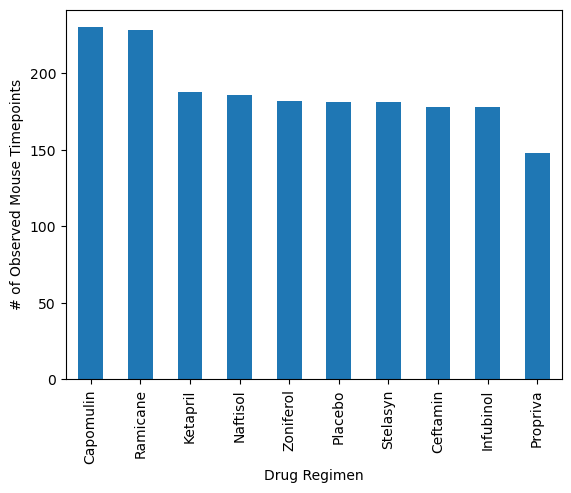

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_data = drug_group["Mouse ID"].count().sort_values(ascending = False)
bar_chart = bar_data.plot(kind="bar")
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("# of Observed Mouse Timepoints")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Ceftamin'),
  Text(8, 0, 'Infubinol'),
  Text(9, 0, 'Propriva')])

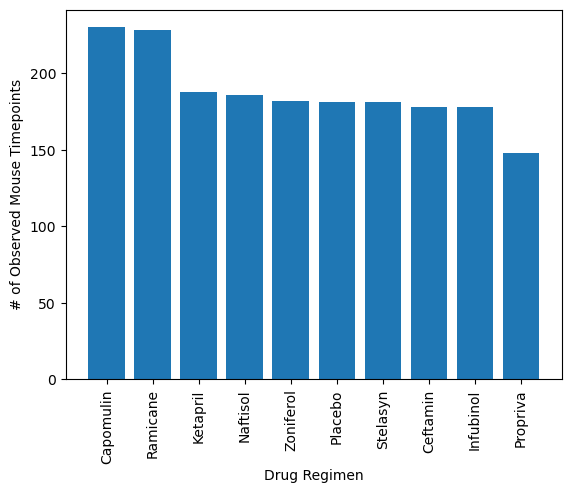

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x = bar_data.index
y = bar_data
plt.bar(x,y, align = "center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 90)


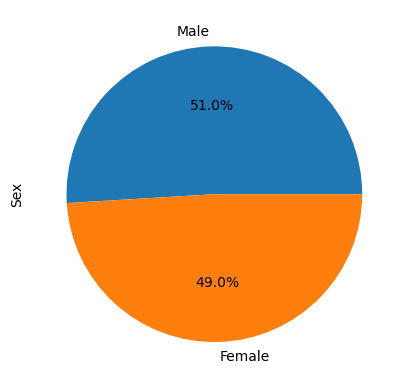

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = mouse_combined_data_cleaned["Sex"].value_counts()
pie_chart = mouse_sex.plot(kind = "pie",autopct="%1.1f%%")
pie_chart.set_ylabel("Sex")
plt.show()

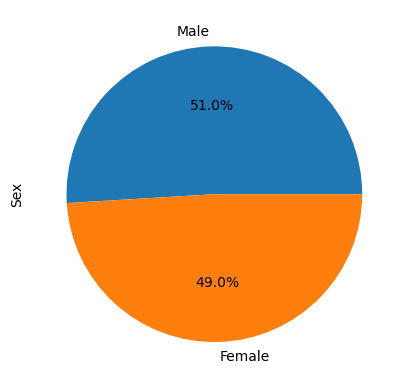

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_label = mouse_sex.index
plt.pie(mouse_sex, labels = mouse_label, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filter_data = mouse_combined_data_cleaned[mouse_combined_data_cleaned["Drug Regimen"].isin(drug_list)].reset_index()

# Start by getting the last (greatest) timepoint for each mouse
mouse_group = filter_data.groupby(["Mouse ID"])
max_timepoint = mouse_group["Timepoint"].max()
df_maxtimepoint= pd.DataFrame(max_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_by_timepoint = pd.merge(df_maxtimepoint,mouse_combined_data_cleaned,on = ("Mouse ID","Timepoint"),how="left")
merge_by_timepoint

,Mouse ID,Timepoint,index,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,1804,67.973419,2,Infubinol,Female,20,23
1,a251,45,1786,65.525743,1,Infubinol,Female,21,25
2,a275,45,1856,62.999356,3,Ceftamin,Female,20,28
3,a411,45,1773,38.407618,1,Ramicane,Male,3,22
4,a444,45,1836,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...,...
95,y769,45,1767,68.594745,4,Ceftamin,Female,6,27
96,y793,45,1797,31.896238,2,Capomulin,Male,17,17
97,y865,45,1766,64.729837,3,Ceftamin,Male,23,26
98,z578,45,1799,30.638696,0,Ramicane,Male,11,16


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
'''see previous response'''

# Create empty list to fill with tumor vol data (for plotting)
'''see next response'''

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_ind_data = merge_by_timepoint.loc[merge_by_timepoint["Drug Regimen"]==drug]
    
    # add subset 
    Tumor_vol = drug_ind_data["Tumor Volume (mm3)"]
    quartiles = Tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    subset = [i for i in Tumor_vol if i > upper_bound or i<lower_bound]
    # Determine outliers using upper and lower bounds
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"{drug}'s potential outliers are {subset}")
    print(f"------------------------------------------------------------")

The lower quartile of Capomulin treatments is: 32.37735684
The upper quartile of Capomulin treatments is: 40.1592203
The interquartile range of Capomulin treatments is: 7.781863460000004
Values below 20.70456164999999 could be Capomulin outliers.
Values above 51.83201549 could be Capomulin outliers.
Capomulin's potential outliers are []
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56046955
The upper quartile of Ramicane treatments is: 40.65900627
The interquartile range of Ramicane treatments is: 9.098536719999998
Values below 17.912664470000003 could be Ramicane outliers.
Values above 54.30681135 could be Ramicane outliers.
Ramicane's potential outliers are []
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.04860769
The upper quartile of Infubinol treatments is: 65.52574285
The interquartile range of Infubinol treatments is: 11.477135160000003
Values below 36

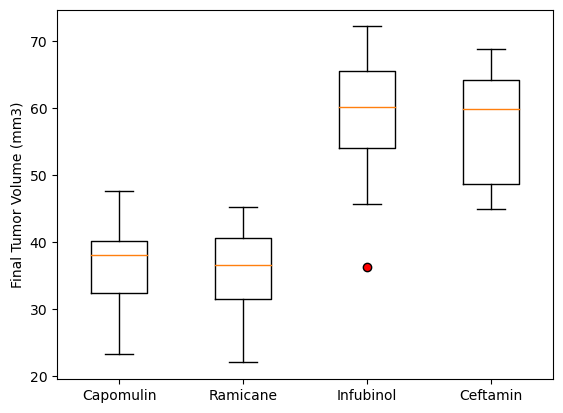

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_data=[]
for drug in drug_list:
    drug_ind_data = merge_by_timepoint.loc[merge_by_timepoint["Drug Regimen"]==drug]
    tumor_vol_data.append(drug_ind_data["Tumor Volume (mm3)"])

plt.boxplot(tumor_vol_data, flierprops = dict(markerfacecolor = "red"))
plt.xticks([1,2,3,4], drug_list)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

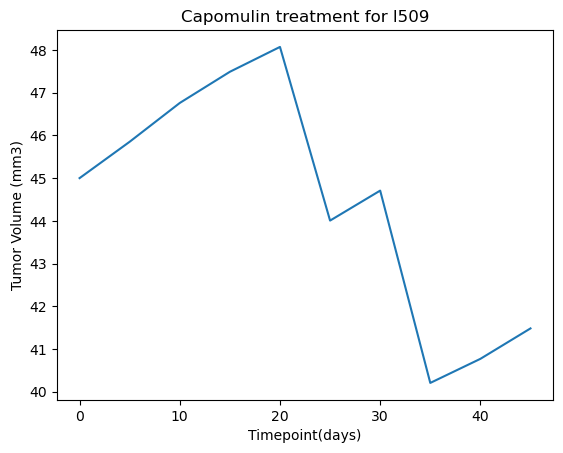

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_selection = "l509"
drug = "Capomulin"
x_value = mouse_combined_data_cleaned.loc[(mouse_combined_data_cleaned["Mouse ID"]==mouse_selection) 
                                          & (mouse_combined_data_cleaned["Drug Regimen"]==drug),"Timepoint"]
y_value = mouse_combined_data_cleaned.loc[(mouse_combined_data_cleaned["Mouse ID"]==mouse_selection) 
                                          & (mouse_combined_data_cleaned["Drug Regimen"]==drug),"Tumor Volume (mm3)"]
plt.plot(x_value,y_value)
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"{drug} treatment for {mouse_selection}")
plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

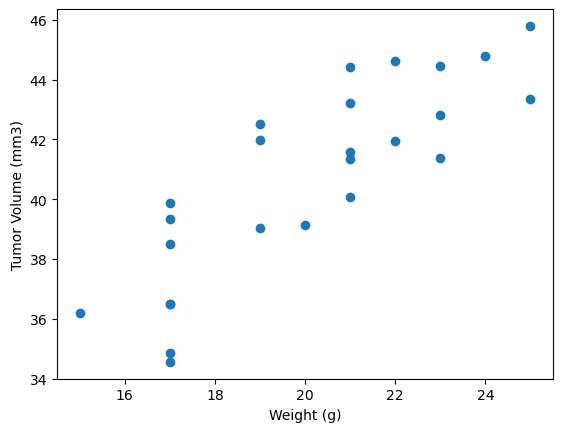

In [37]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
drug = "Capomulin"
df_Capomulin = mouse_combined_data_cleaned.loc[mouse_combined_data_cleaned["Drug Regimen"]==drug,:]
weights =  df_Capomulin.groupby(["Mouse ID"])["Weight (g)"].mean()
tumor_vol_average =  df_Capomulin.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
plt.scatter(weights, tumor_vol_average)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


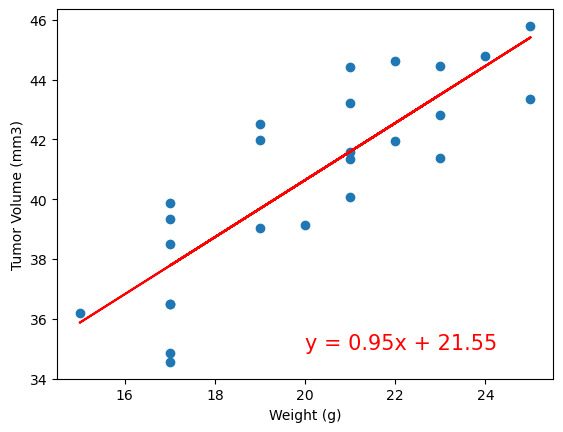

In [38]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weights, tumor_vol_average)
regress_values = weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")
plt.scatter(weights, tumor_vol_average)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(weights,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.show()